# Weather Madrid 2001-2015

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
weather = pd.read_csv('weather_modificat_vo.csv',index_col= 'date')
weather.index = pd.to_datetime(weather.index)
weather.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover
count,5446.000000,5446.000000,5446.000000,5446.000000,5446.000000,5446.000000,5446.000000,5446.000000,5446.000000,5448.000000,5448.000000,5448.000000,5448.000000,5448.000000,3329.000000,5448.000000,4256.000000
mean,21.040947,14.658649,8.610356,7.932978,4.764781,1.185090,80.616783,57.308667,33.729526,1020.412812,1017.807269,1014.973752,22.310756,9.380140,43.831481,0.139018,3.112312
std,8.960088,7.656112,6.888982,4.737839,4.662723,4.928458,17.925943,20.026650,19.534531,6.239404,6.455958,6.932723,9.769765,5.039512,12.256210,1.079722,1.801052
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,26.000000,15.000000,4.000000,994.000000,986.000000,965.000000,2.000000,2.000000,21.000000,0.000000,0.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,67.000000,40.000000,17.000000,1017.000000,1014.000000,1011.000000,14.000000,6.000000,35.000000,0.000000,1.000000
50%,20.000000,14.000000,9.000000,8.000000,5.000000,1.000000,87.000000,58.000000,30.000000,1020.000000,1018.000000,1015.000000,21.000000,8.000000,42.000000,0.000000,3.000000
75%,29.000000,21.000000,14.000000,11.000000,8.000000,5.000000,94.000000,74.000000,47.000000,1024.000000,1022.000000,1019.000000,27.000000,11.000000,52.000000,0.000000,5.000000
max,41.000000,31.000000,26.000000,20.000000,16.000000,14.000000,100.000000,99.000000,93.000000,1047.000000,1043.000000,1041.000000,132.000000,39.000000,98.000000,32.000000,8.000000


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5448 entries, 2001-01-01 to 2015-12-31
Data columns (total 18 columns):
Max TemperatureC              5446 non-null float64
Mean TemperatureC             5446 non-null float64
Min TemperatureC              5446 non-null float64
Dew PointC                    5446 non-null float64
MeanDew PointC                5446 non-null float64
Min DewpointC                 5446 non-null float64
Max Humidity                  5446 non-null float64
Mean Humidity                 5446 non-null float64
Min Humidity                  5446 non-null float64
Max Sea Level PressurehPa     5448 non-null int64
Mean Sea Level PressurehPa    5448 non-null int64
Min Sea Level PressurehPa     5448 non-null int64
Max Wind SpeedKm/h            5448 non-null int64
Mean Wind SpeedKm/h           5448 non-null int64
Max Gust SpeedKm/h            3329 non-null float64
Precipitationmm               5448 non-null float64
CloudCover                    4256 non-null float64
E

Drop inclomplet columns and filling void spaces

In [4]:
weather.drop(['Precipitationmm','CloudCover','Events','Max Gust SpeedKm/h'],axis = 1,inplace = True)

In [5]:
weather.fillna(method='bfill',inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5448 entries, 2001-01-01 to 2015-12-31
Data columns (total 14 columns):
Max TemperatureC              5448 non-null float64
Mean TemperatureC             5448 non-null float64
Min TemperatureC              5448 non-null float64
Dew PointC                    5448 non-null float64
MeanDew PointC                5448 non-null float64
Min DewpointC                 5448 non-null float64
Max Humidity                  5448 non-null float64
Mean Humidity                 5448 non-null float64
Min Humidity                  5448 non-null float64
Max Sea Level PressurehPa     5448 non-null int64
Mean Sea Level PressurehPa    5448 non-null int64
Min Sea Level PressurehPa     5448 non-null int64
Max Wind SpeedKm/h            5448 non-null int64
Mean Wind SpeedKm/h           5448 non-null int64
dtypes: float64(9), int64(5)
memory usage: 638.4 KB


# Some graphics

Temperature increasing

In [6]:
weather.insert(0, 'Time',range(5448))

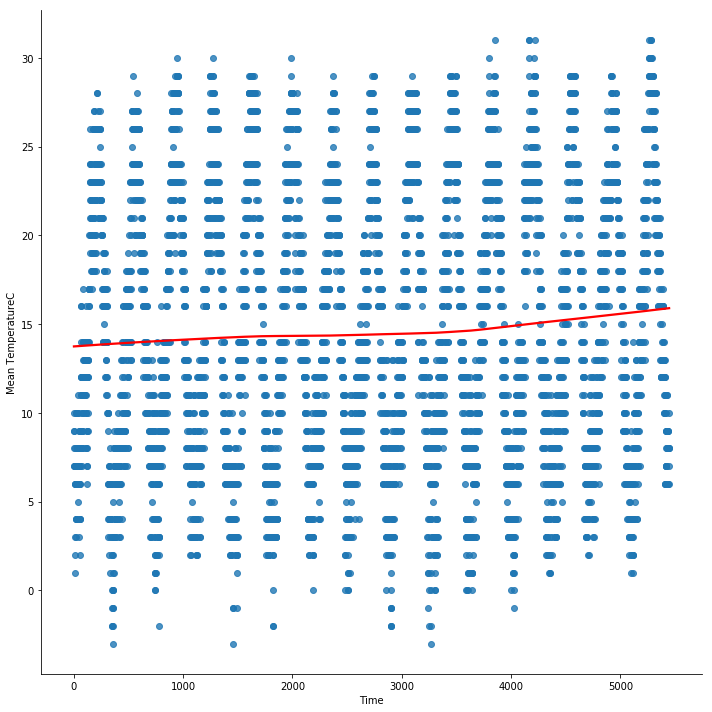

In [7]:
sns.lmplot(x= 'Time' , y="Mean TemperatureC", data=weather,size = 10,lowess=True,line_kws={'color': 'red'})

In [8]:
result = []
for index,row in weather.iterrows():
    j = row['Time']
    j = j%364 
    if j < 80 or j >= 355:
        result.append(0)
    if j >= 80 and j < 172 :
        result.append(1)
    if j >= 172 and j < 264 :
        result.append(2)
    if j >= 264 and j < 355 :
        result.append(3)
weather['Season']=result

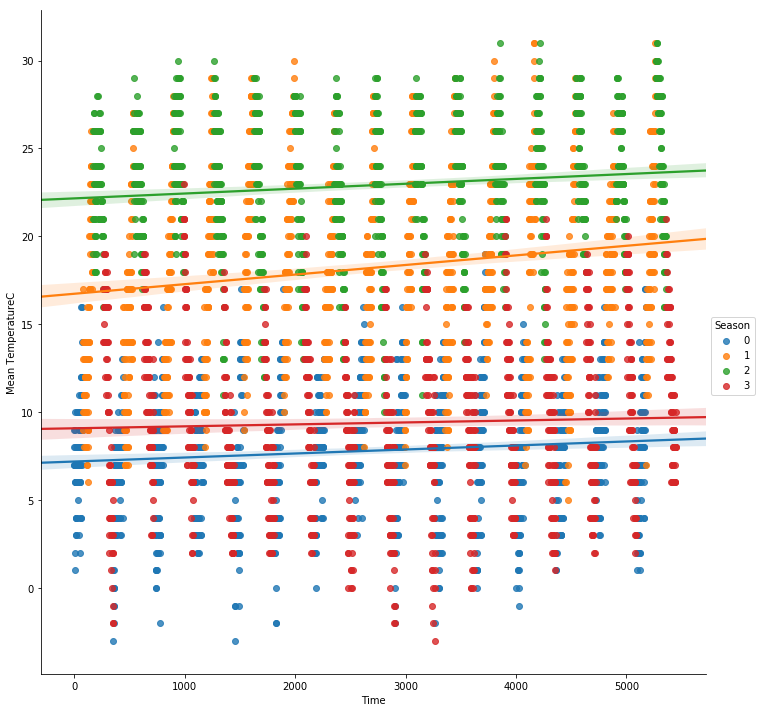

In [9]:
sns.lmplot(x="Time", y="Mean TemperatureC",hue= 'Season', data=weather, size = 10)

In [10]:
weather.drop(['Time'],axis = 1,inplace=True, )

# AirQuality 2001-2015

SO_2: sulphur dioxide level measured in μg/m³. High levels of sulphur dioxide can produce irritation in the skin and
    membranes, and worsen asthma or heart diseases in sensitive groups.

CO: carbon monoxide level measured in mg/m³. Carbon monoxide poisoning involves headaches, dizziness and confusion in
    short exposures and can result in loss of consciousness, arrhythmias, seizures or even death in the long term.

NO_2: nitrogen dioxide level measured in μg/m³. Long-term exposure is a cause of chronic lung diseases, and are harmful
    for the vegetation.

PM25: particles smaller than 2.5 μm level measured in μg/m³. The size of these particles allow them to penetrate into the
    gas exchange regions of the lungs (alveolus) and even enter the arteries. Long-term exposure is proven to be related 
    to low birth weight and high blood pressure in newborn babies.

PM10: particles smaller than 10 μm. Even though the cannot penetrate the alveolus, they can still penetrate through the 
    lungs and affect other organs. Long term exposure can result in lung cancer and cardiovascular complications.

O_3: ozone level measured in μg/m³. High levels can produce asthma, bronchytis or other chronic pulmonary diseases in 
    sensitive groups or outdoor workers.

In [11]:
airdata = pd.DataFrame()
airdata.index = pd.to_datetime(airdata.index)
for i in range(1,16): 
    result = pd.read_csv('madrid_20{0}{1}.csv'.format(int(i/10),i%10),index_col='date')
    result.index = pd.to_datetime(result.index)
    airdata = pd.concat([airdata,result])
airdata.info()

/home/jordi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3319512 entries, 2001-08-01 01:00:00 to 2015-08-01 00:00:00
Data columns (total 17 columns):
BEN        float64
CO         float64
EBE        float64
MXY        float64
NMHC       float64
NO         float64
NO_2       float64
NOx        float64
OXY        float64
O_3        float64
PM10       float64
PM25       float64
PXY        float64
SO_2       float64
TCH        float64
TOL        float64
station    int64
dtypes: float64(16), int64(1)
memory usage: 455.9 MB


In [12]:
airdata = airdata.drop('BEN',1)
airdata = airdata.drop('EBE',1)
airdata = airdata.drop('MXY',1)
airdata = airdata.drop('NMHC',1)
airdata = airdata.drop('NO',1)
airdata = airdata.drop('NOx',1)
airdata = airdata.drop('OXY',1)
airdata = airdata.drop('PXY',1)
airdata = airdata.drop('TCH',1)
airdata = airdata.drop('TOL',1)
airdata = airdata.drop('PM25',1)
airdata = airdata.drop('station',1)
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3319512 entries, 2001-08-01 01:00:00 to 2015-08-01 00:00:00
Data columns (total 5 columns):
CO      float64
NO_2    float64
O_3     float64
PM10    float64
SO_2    float64
dtypes: float64(5)
memory usage: 152.0 MB


In [13]:
airdata = airdata.resample('D',how='mean')
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 5 columns):
CO      5479 non-null float64
NO_2    5479 non-null float64
O_3     5479 non-null float64
PM10    5479 non-null float64
SO_2    5479 non-null float64
dtypes: float64(5)
memory usage: 256.8 KB


/home/jordi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


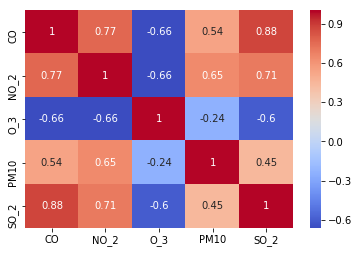

In [14]:
sns.heatmap(airdata.corr(),cmap='coolwarm',annot=True)

In [15]:
airdatam = [pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame]

In [16]:
airdatam[0] = airdata.drop(['NO_2','O_3','PM10','SO_2'], axis = 1)
airdatam[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
CO    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


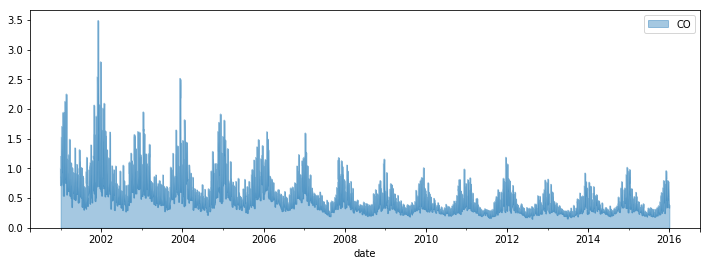

In [17]:
airdatam[0].plot.area(alpha=0.4,figsize=(12,4))

In [18]:
airdatam[1] = airdata.drop(['CO','O_3','PM10','SO_2'], axis = 1)
airdatam[1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
NO_2    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


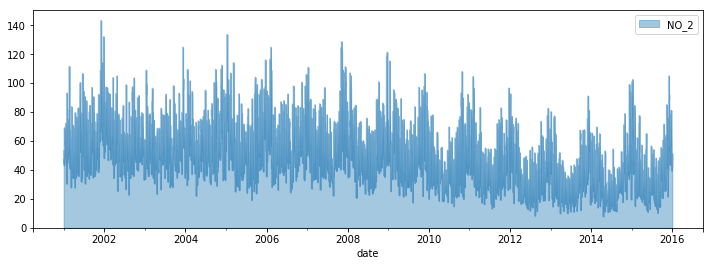

In [19]:
airdatam[1].plot.area(alpha=0.4,figsize=(12,4))

In [20]:
airdatam[2] = airdata.drop(['NO_2','CO','PM10','SO_2'], axis = 1)
airdatam[2].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
O_3    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


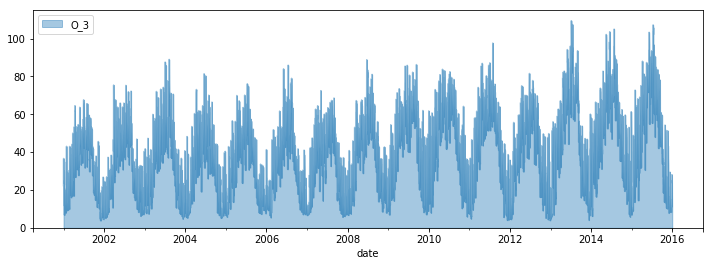

In [21]:
airdatam[2].plot.area(alpha=0.4,figsize=(12,4))

In [22]:
airdatam[3] = airdata.drop(['NO_2','O_3','CO','SO_2'], axis = 1)
airdatam[3].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
PM10    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


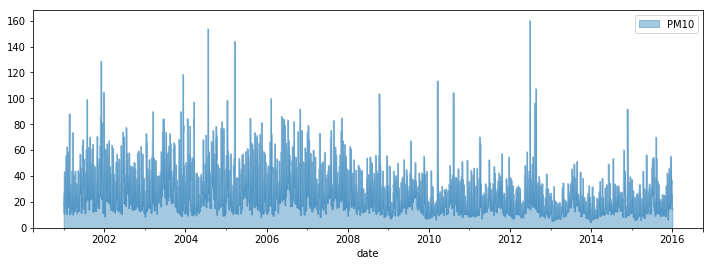

In [23]:
airdatam[3].plot.area(alpha=0.4,figsize=(12,4))

In [24]:
airdatam[4] = airdata.drop(['NO_2','O_3','PM10','CO'], axis = 1)
airdatam[4].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
SO_2    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


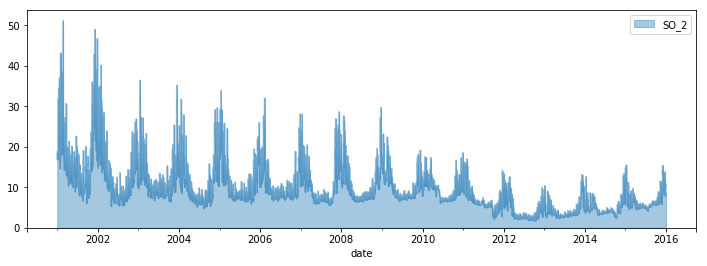

In [25]:
airdatam[4].plot.area(alpha=0.4,figsize=(12,4))

In [26]:
for i in range(5):
    airdatam[i] = airdatam[i].join(weather)
    airdatam[i].dropna(inplace=True)

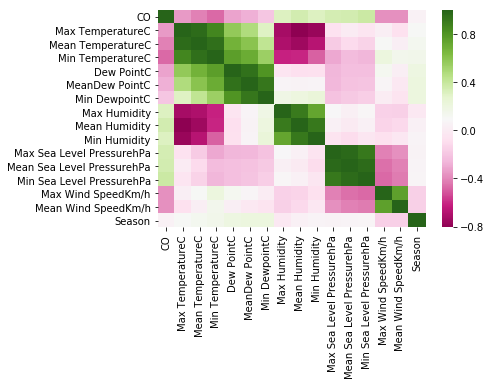

In [27]:
sns.heatmap(airdatam[0].corr(), cmap="PiYG")

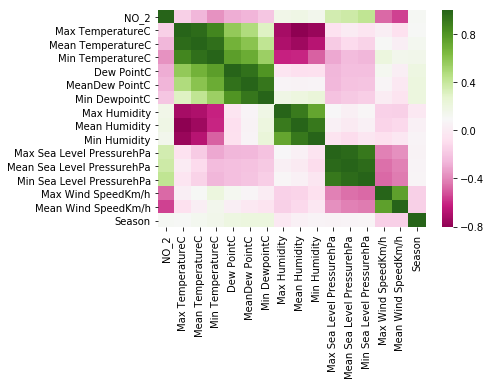

In [28]:
sns.heatmap(airdatam[1].corr(), cmap="PiYG")

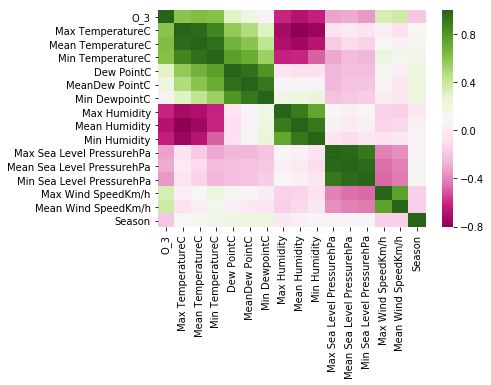

In [29]:
sns.heatmap(airdatam[2].corr(), cmap="PiYG")

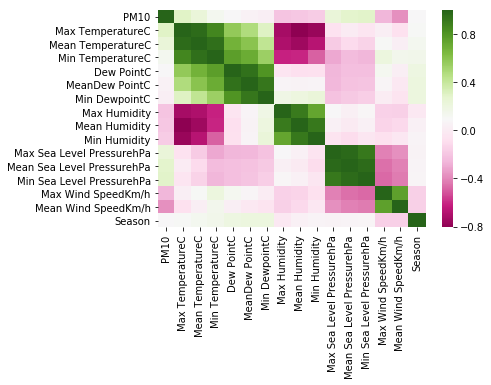

In [30]:
sns.heatmap(airdatam[3].corr(), cmap="PiYG")

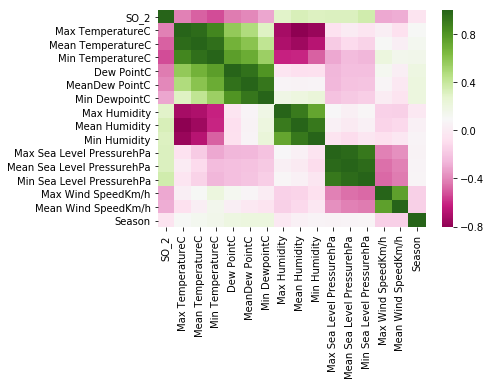

In [31]:
sns.heatmap(airdatam[4].corr(), cmap="PiYG")

# Machine Learning

In [32]:
gas = ['CO','NO_2','O_3','PM10','SO_2']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
data = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(airdatam[i].drop( gas[i] ,axis=1), airdatam[i][gas[i]], test_size=0.2, random_state=101)
    data.append([X_train,X_test,y_train,y_test])

In [35]:
linearmodel = []
prediction = []
for i in range(5):
    linearmodel.append(LinearRegression())
    linearmodel[i].fit(data[i][0],data[i][2])
    prediction.append(linearmodel[i].predict(data[i][1]))

In [36]:
for i in range(5):
    print("Mean squared error: %.2f"
      % mean_squared_error(data[i][3], prediction[i]))

Mean squared error: 0.05
Mean squared error: 196.66
Mean squared error: 142.35
Mean squared error: 184.50
Mean squared error: 17.70


In [37]:
for i in range(5):
    print('Variance score: %.2f' % r2_score(data[i][3], prediction[i]))

Variance score: 0.40
Variance score: 0.51
Variance score: 0.67
Variance score: 0.27
Variance score: 0.47
